In [1]:
import pandas as pd
import h5py
import scanpy as sc
from scipy import sparse
import pybiomart
import numpy as np

## Import Non Preprocessed

In [ ]:
data = sc.read_h5ad('recount3/mouse_FULL_sparse_with_geneIDs_with_metadata.h5ad')

In [ ]:
data_dense = data.X.todense()

In [ ]:
data.var['Ensemble ID']

In [26]:
data_dense_df = pd.DataFrame(data_dense)
data_dense_df.columns = data.var['Ensemble ID']
data_dense_df.index = data.obs["Sample ID"]
data_dense_df["study"] = data.obs["study"]
data_dense_df['pattern.predict.type'] = data.obs["pattern.predict.type"]

NameError: name 'data_dense' is not defined

In [ ]:
data_dense_df

In [ ]:
data_sc = data_dense_df[data_dense_df["pattern.predict.type"] == "scrna-seq"]
data_bulk = data_dense_df[data_dense_df["pattern.predict.type"] == "rna-seq"]

## Import Preprocessed

In [2]:
data_preprocessed = sc.read_h5ad('recount3/preprocessed_data_with_metadata_2_8.h5ad')

/home/kli3/.conda/envs/scbert/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
data_preprocessed_dense = data_preprocessed.X.todense()

In [27]:
data_preprocessed_dense_df = pd.DataFrame(data_preprocessed_dense)
data_preprocessed_dense_df.columns = data_preprocessed.var['Ensemble ID']
data_preprocessed_dense_df.index = data_preprocessed.obs["Sample ID"]
data_preprocessed_dense_df["study"] = data_preprocessed.obs["study"]
data_preprocessed_dense_df['pattern.predict.type'] = data_preprocessed.obs["pattern.predict.type"]

In [28]:
data_preprocessed_dense_df

Ensemble ID,ENSMUSG00000079800.2,ENSMUSG00000095092.1,ENSMUSG00000079192.2,ENSMUSG00000079794.2,ENSMUSG00000094799.1,ENSMUSG00000095250.1,ENSMUSG00000095787.1,ENSMUSG00000096100.1,ENSMUSG00000094054.1,ENSMUSG00000095672.1,...,ENSMUSG00000099619.6,ENSMUSG00000099399.6,ENSMUSG00000095366.2,ENSMUSG00000095134.2,ENSMUSG00000096768.8,ENSMUSG00000096850.1,ENSMUSG00000099871.1,project,study,pattern.predict.type
Sample ID,,,,,,,,,,,,,,,,,,,,,
SRR8249400,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.009873,0.004070,0.382206,0.000000,0.002349,0.000000,SRP170963,scrna-seq
SRR8249500,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.331776,0.000000,0.000000,0.000000,SRP170963,scrna-seq
SRR8249300,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.012547,0.000000,0.324801,0.000000,0.000000,0.000000,SRP170963,scrna-seq
SRR8249200,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SRP170963,scrna-seq
SRR8249401,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SRP170963,scrna-seq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5445513,0.028161,0.00000,0.010381,0.000000,0.002889,0.009350,0.037548,0.021748,0.000000,0.005625,...,0.0,0.0,0.000000,0.000000,0.463749,0.000000,0.000000,0.332545,SRP103859,rna-seq
SRR5445514,0.022260,0.00146,0.025770,0.003125,0.001212,0.017463,0.019313,0.033734,0.002712,0.016305,...,0.0,0.0,0.002726,0.001377,0.414815,0.002451,0.000000,0.132699,SRP103859,rna-seq
SRR5445515,0.021291,0.00000,0.024711,0.001606,0.000000,0.013851,0.028319,0.021370,0.000000,0.011721,...,0.0,0.0,0.009428,0.001766,0.138188,0.001064,0.000000,0.189564,SRP103859,rna-seq


In [30]:
data_preprocessed_sc = data_preprocessed_dense_df[data_preprocessed_dense_df["pattern.predict.type"] == "scrna-seq"]
data_preprocessed_bulk = data_preprocessed_dense_df[data_preprocessed_dense_df["pattern.predict.type"] == "rna-seq"]

In [31]:
len(np.unique(data_preprocessed_bulk["study"]))

9416

# PCA

In [9]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=10)

In [10]:
X = pca_data.fit_transform(data_preprocessed_bulk.iloc[:, :-3])

In [11]:
pca_data.explained_variance_ratio_

array([0.1261245 , 0.11010924, 0.05532132, 0.04819434, 0.03652348,
       0.03254747, 0.02766985, 0.02072399, 0.01877504, 0.01541096])

In [13]:
X = pd.DataFrame(X)
X["project"] = list(data_preprocessed_bulk["project"])
X["study"] = list(data_preprocessed_bulk["study"])
X["pattern.predict.type"] = list(data_preprocessed_bulk["pattern.predict.type"])

In [33]:
X["study"] = list(data_preprocessed_bulk["study"])

In [34]:
X

,0,1,2,3,4,5,6,7,8,9,project,study,pattern.predict.type
0,-10.257997,-18.099222,6.581242,-22.966320,-8.163521,-5.423061,8.037645,-0.537993,2.291341,0.931778,0.000006,SRP045763,rna-seq
1,-9.045368,-15.446551,7.738411,-22.527578,-7.730575,-5.234428,5.299837,0.851098,1.044662,-0.700589,0.000008,SRP045763,rna-seq
2,-9.996530,-17.747011,7.938615,-24.315350,-8.578375,-7.715246,7.504414,-0.674383,1.700597,1.188355,0.000005,SRP045763,rna-seq
3,-5.726841,-14.844715,5.214591,-21.703730,-3.948369,-1.838896,3.124825,3.040243,0.273042,1.275113,0.000007,SRP045763,rna-seq
4,-5.285745,-13.870029,3.762869,-17.793928,-1.930278,-2.776507,1.192868,1.818244,1.148300,-3.461375,0.000007,SRP045763,rna-seq
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205292,-18.118259,-20.058626,6.864507,2.923786,-18.873617,2.616576,5.057611,3.131594,-0.769991,7.178052,0.332545,SRP103859,rna-seq
205293,-17.681444,-20.389744,7.000371,2.360963,-18.982248,1.998062,4.271248,3.605669,-0.838599,7.008381,0.132699,SRP103859,rna-seq
205294,-21.388672,-13.030731,7.819621,6.111095,-15.571096,5.573281,12.260968,-2.113780,1.667659,9.395477,0.189564,SRP103859,rna-seq
205295,-21.404858,-13.080465,7.770878,6.120700,-15.671041,5.571830,12.250671,-2.125459,1.647235,9.478944,0.316328,SRP103859,rna-seq


In [15]:
import seaborn as sns

In [18]:
X.iloc[:100,:]["study"]

0     SRR1557112
1     SRR1557113
2     SRR1557114
3     SRR1557115
4     SRR1557116
         ...    
95    SRR7442372
96    SRR7442373
97    SRR7442374
98    SRR7442375
99    SRR7442376
Name: study, Length: 100, dtype: object

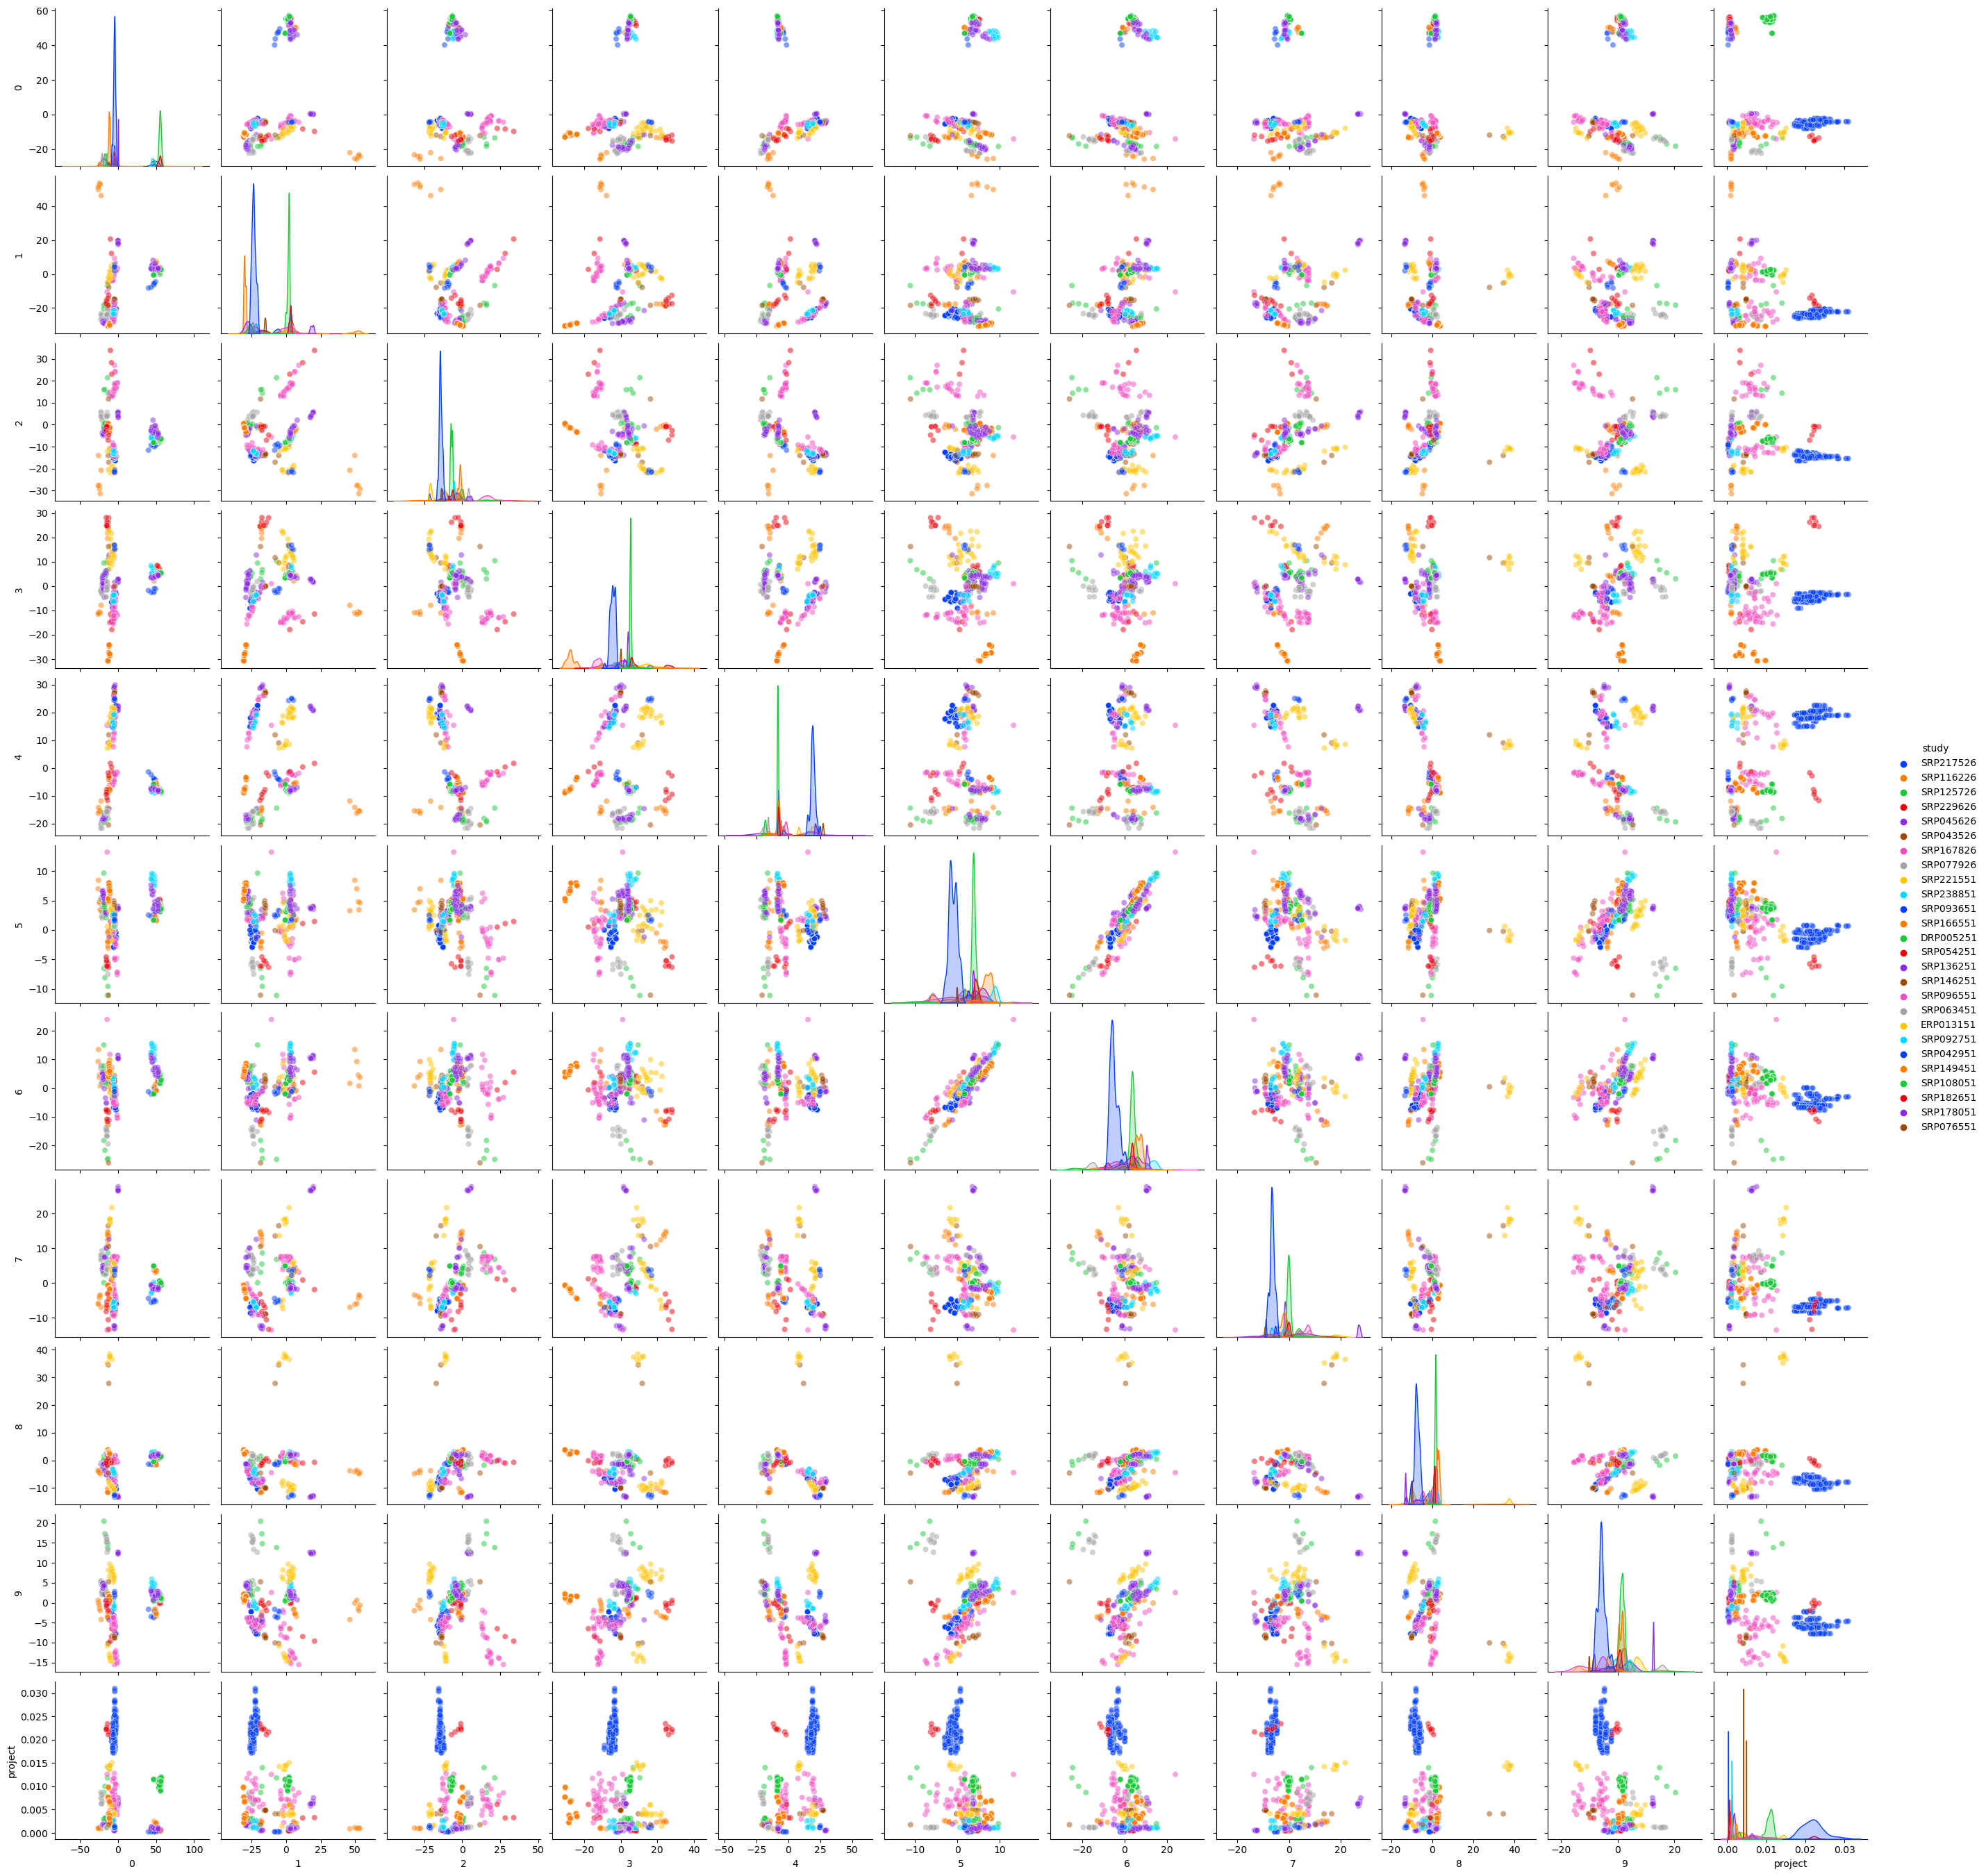

In [36]:
sns.pairplot(X.iloc[10000:10500,:], hue="study", plot_kws = {'alpha': 0.5}, palette = "bright")

In [ ]:
http://idies.jhu.edu/recount3/data/human/data_sources/sra/gene_sums/65/SRP107565/sra.gene_sums.SRP107565.G026.gz